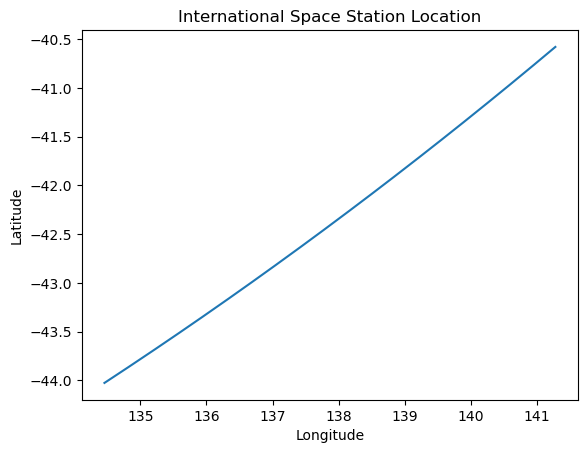

In [10]:
import datetime
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

df_list = []

for _ in range(20):
    ISS = requests.get('http://api.open-notify.org/iss-now.json')
    results = ISS.json()
    
    df_list.append(results['iss_position'])
    #print("Running...")

    time.sleep(5)

df = pd.DataFrame(df_list)

if len(df) > 0:  # Check if DataFrame is not empty
    df.reset_index(drop=True, inplace=True)
    df['Number'] = range(1, len(df) + 1)
else:
    print("DataFrame is empty.")

#Using matplotlib

latitudes = df['latitude'].astype(float)
longitudes = df['longitude'].astype(float)

plt.plot(longitudes, latitudes)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('International Space Station Location')

plt.show()